**GROUP WORK PROJECT 1**

**QUESTION 4**

**Empirical Analysis of ETFs**

**Pick a sector ETF (in the US, for example, XLRE)**


**QUESTIONS 4(a): Find the 30 largest holdings.**

**ANSWER**

For the group work, we decided to select a utility ETF called XLU, which has about 30 Holdings. The index includes securities of companies from the following industries: electric utilities; water utilities; multi-utilities; independent power and renewable electricity producers; and gas utilities. The fund is non-diversified.

In [25]:
# Importing requied libraries

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yfin
import math

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from datetime import date

pd.options.display.float_format = "{:,.6f}".format

**QUESTION 4(b):  Get at least 6 months of data (~ 120 data points).**

**ANSWER**

One year of xlu data had been fetched from yfinance database as follows:


In [9]:
# Starting and end dates
start = datetime.date(2019, 1, 1)
end = datetime.date(2020, 1, 1)

xlu_tickers = [
    "NEE",   # NextEra Energy Inc.
    "SO",    # Southern Company
    "DUK",   # Duke Energy Corporation
    "AEP",   # American Electric Power Company Inc.
    "D",     # Dominion Energy Inc.
    "SRE",   # Sempra
    "EXC",   # Exelon Corporation
    "VST",   # Vistra Corp.
    "PEG",   # Public Service Enterprise Group Inc.
    "PCG",   # PG&E Corporation
    "XEL",   # Xcel Energy Inc.
    "ED",    # Consolidated Edison Inc.
    "AWK",   # American Water Works Company Inc.
    "WEC",   # WEC Energy Group Inc.
    "EIX",   # Edison International
    "ES",    # Eversource Energy
    "ATO",   # Atmos Energy Corporation
    "CMS",   # CMS Energy Corporation
    "NI",    # NiSource Inc.
    "PNW",   # Pinnacle West Capital Corporation
    "CNP",   # CenterPoint Energy Inc.
    "EVRG",  # Evergy Inc.
    "FE",    # FirstEnergy Corp.
    "NRG",   # NRG Energy Inc.
    "OGE",   # OGE Energy Corp.
    "AEE",   # Ameren Corporation
    "AES",   # The AES Corporation
    "LNT",   # Alliant Energy Corporation
    "UGI",   # UGI Corporation
    "IDA"    # IDACORP Inc.
]

# Get ETF data
df = yfin.download(xlu_tickers, start, end, auto_adjust = False)["Adj Close"]

# Convert DataFrame index to timezone-aware (UTC)
df.index = df.index.tz_localize('UTC')

[*********************100%***********************]  30 of 30 completed


Let us have a look at the first five rows of the daily data.

In [11]:
df.head(5)

Ticker,AEE,AEP,AES,ATO,AWK,CMS,CNP,D,DUK,ED,...,OGE,PCG,PEG,PNW,SO,SRE,UGI,VST,WEC,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00+00:00,53.270641,58.418903,11.534036,77.131958,79.253189,40.172016,23.255312,54.124619,65.633408,59.839409,...,28.728685,23.682159,41.137558,63.742733,33.987118,43.674412,40.206638,19.215071,55.447853,39.967182
2019-01-03 00:00:00+00:00,53.404804,58.282772,11.525904,77.715675,79.565651,40.246853,23.388203,53.866089,65.610161,59.990711,...,28.983994,23.831417,41.129459,64.388840,34.469101,43.874874,40.706722,19.034769,55.595528,39.809700
2019-01-04 00:00:00+00:00,54.159462,58.819359,11.908202,78.711502,80.163826,40.621040,23.820084,54.907818,66.152603,60.962296,...,29.442024,24.279190,41.574585,65.181114,34.756725,45.188057,41.591484,19.807493,56.005775,40.199276
2019-01-07 00:00:00+00:00,53.538963,58.490982,11.965139,78.136307,79.315659,40.413158,23.911448,54.375546,65.873634,60.078323,...,29.284349,18.856173,41.663609,65.058044,34.678982,45.179871,41.676113,20.142342,55.751415,40.025208
2019-01-08 00:00:00+00:00,54.385868,59.211803,12.241695,79.157883,80.476303,41.020187,24.368246,55.006664,66.702766,60.444653,...,29.967651,17.473057,41.825462,66.034912,35.666264,46.443958,41.991550,20.150923,56.325737,40.489361


**Overview of the ETF Data**

We can use the pandas *describe()* method to show summary stats of our data. We can see that all assets have same number of observations (count) since they all belong to the same portfolio. The other summary stats are relatively basic, like mean and standard deviation along with showing minimum, maximum, and a few quantiles.

In [12]:
df.describe()

Ticker,AEE,AEP,AES,ATO,AWK,CMS,CNP,D,DUK,ED,...,OGE,PCG,PEG,PNW,SO,SRE,UGI,VST,WEC,XEL
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,62.849828,71.180581,14.031441,90.896077,101.687288,49.038936,24.547177,59.984373,71.137370,69.934112,...,32.676920,14.893234,48.428759,72.444123,44.384741,55.560343,39.517781,21.618953,70.069636,49.470813
std,3.245783,5.109215,1.068596,5.416582,9.813963,3.909192,1.196643,3.548471,2.900219,4.330080,...,1.146571,5.269217,2.487902,3.038540,4.653333,5.162169,2.706561,1.422285,6.990331,3.973183
min,53.270641,58.282772,11.525904,77.131958,79.253189,40.172016,21.099735,51.683754,64.827530,59.289913,...,28.728685,3.781185,41.072811,63.435051,33.987118,43.674412,32.437714,18.584148,55.447853,39.809700
25%,60.837055,67.466377,13.314818,87.135111,93.918909,45.967127,24.072481,58.064054,69.467724,67.827499,...,32.078148,10.634583,47.887321,70.596048,40.785179,51.892806,37.717446,20.698181,64.181862,46.539080
50%,63.895050,72.929672,13.999062,92.650063,104.843292,49.257170,24.733862,59.510864,70.553856,70.953808,...,32.867317,17.030260,48.764420,73.282547,44.307457,56.768841,40.448433,21.774381,71.049866,50.785330
75%,65.094193,75.268440,14.701838,95.203943,110.105635,52.592820,25.513126,63.671892,72.968164,72.358786,...,33.288615,18.866123,50.065636,74.517920,49.139088,59.809645,41.575362,22.810294,76.504234,52.605725
max,68.704849,78.527771,16.838135,99.922455,117.211868,55.235100,26.322069,66.020317,77.733902,77.404633,...,35.019451,24.279190,52.458248,77.214256,51.908264,63.737053,43.899555,23.848816,81.964584,55.469276


**QUESTION 4(C) : Compute the daily returns.**

**ANSWER**
**Importance of Daily Returns**

In financial analysis, the daily return of an asset, XLU-ETF in our case, is a fundamental metric used to measure its performance over a single trading day. It definately aids in quantifying the percentage change in the asset's value between the close of one trading day and the close of the subsequent day. To compute a daily return you have to use the closing prices of the asset on two consecutive trading days.

To account for dividend and stock splits, technically, one must use adjusted closing price to avoid impact on the individual prices of an ETF consitituents assets/holdings.



In [26]:
# 1. Compute daily log returns
daily_returns = df.pct_change() # Used simple return to compute the daily return (alternatively: log return can also be used, np.log(df) - np.log(df.shift(1))
daily_returns = daily_returns.dropna()
daily_returns.head()

Ticker,AEE,AEP,AES,ATO,AWK,CMS,CNP,D,DUK,ED,...,OGE,PCG,PEG,PNW,SO,SRE,UGI,VST,WEC,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03 00:00:00+00:00,0.002519,-0.002330,-0.000705,0.007568,0.003943,0.001863,0.005714,-0.004777,-0.000354,0.002528,...,0.008887,0.006303,-0.000197,0.010136,0.014181,0.004590,0.012438,-0.009383,0.002663,-0.003940
2019-01-04 00:00:00+00:00,0.014131,0.009207,0.033169,0.012814,0.007518,0.009297,0.018466,0.019339,0.008268,0.016196,...,0.015803,0.018789,0.010823,0.012305,0.008344,0.029930,0.021735,0.040595,0.007379,0.009786
2019-01-07 00:00:00+00:00,-0.011457,-0.005583,0.004781,-0.007308,-0.010580,-0.005118,0.003836,-0.009694,-0.004217,-0.014500,...,-0.005355,-0.223361,0.002141,-0.001888,-0.002237,-0.000181,0.002035,0.016905,-0.004542,-0.004330
2019-01-08 00:00:00+00:00,0.015818,0.012324,0.023113,0.013074,0.014633,0.015021,0.019104,0.011607,0.012587,0.006098,...,0.023333,-0.073351,0.003885,0.015015,0.028469,0.027979,0.007569,0.000426,0.010301,0.011597
2019-01-09 00:00:00+00:00,-0.007401,-0.007574,-0.001993,-0.016376,-0.012758,-0.009528,-0.012270,-0.001659,-0.014754,-0.007905,...,-0.001897,0.015376,-0.007546,-0.013862,-0.008500,-0.009777,-0.010260,-0.006817,-0.005972,-0.007984


**Question 4(d): Compute the covariance matrix.**

**ANSWER**

In [16]:
# Standardize stock returns dataset
daily_returns_means = daily_returns.mean()
daily_returns_stds = daily_returns.std()
standardized_returns = (daily_returns - daily_returns_means) / daily_returns_stds
standardized_returns.head()

Ticker,AEE,AEP,AES,ATO,AWK,CMS,CNP,D,DUK,ED,...,OGE,PCG,PEG,PNW,SO,SRE,UGI,VST,WEC,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03 00:00:00+00:00,0.183466,-0.417068,-0.180822,0.763002,0.274972,0.074813,0.474449,-0.621051,-0.107662,0.196302,...,0.936084,0.058488,-0.115205,1.020395,1.412449,0.330939,0.903837,-0.718708,0.143366,-0.582432
2019-01-04 00:00:00+00:00,1.497979,0.948041,2.525044,1.371699,0.663037,0.908481,1.557137,2.049110,0.984254,1.857481,...,1.734379,0.196467,1.214955,1.250025,0.750993,3.088842,1.559411,2.999637,0.675784,0.959864
2019-01-07 00:00:00+00:00,-1.398539,-0.801928,0.257437,-0.963021,-1.301311,-0.707956,0.314921,-1.165514,-0.596875,-1.873475,...,-0.707862,-2.479326,0.167036,-0.252975,-0.448097,-0.188322,0.170285,1.237116,-0.670076,-0.626236
2019-01-08 00:00:00+00:00,1.689012,1.316865,1.721828,1.401933,1.435302,1.550268,1.611308,1.192941,1.531241,0.630106,...,2.603598,-0.821694,0.377492,1.537098,3.031582,2.876486,0.560505,0.011095,1.005714,1.163301
2019-01-09 00:00:00+00:00,-0.939387,-1.037585,-0.283725,-2.015204,-1.537660,-1.202508,-1.052572,-0.275865,-1.931298,-1.071871,...,-0.308658,0.158749,-1.002339,-1.520957,-1.157903,-1.232710,-0.696668,-0.527770,-0.831572,-1.036762


In [17]:
# Calculate covariance for standardized return matrix
standardized_returns_dvd_sqrt_n=(standardized_returns/math.sqrt(len(standardized_returns)-1))
standardized_returns_cov = standardized_returns_dvd_sqrt_n.T@standardized_returns_dvd_sqrt_n
standardized_returns_cov.head()

Ticker,AEE,AEP,AES,ATO,AWK,CMS,CNP,D,DUK,ED,...,OGE,PCG,PEG,PNW,SO,SRE,UGI,VST,WEC,XEL
Ticker,,,,,,,,,,,,,,,,,,,,,
AEE,1.000000,0.806507,0.522380,0.771702,0.724854,0.834287,0.400584,0.620387,0.662888,0.757679,...,0.781364,0.138428,0.646137,0.758154,0.689451,0.538975,0.345585,0.258081,0.808671,0.827980
AEP,0.806507,1.000000,0.389617,0.716669,0.757823,0.851061,0.479606,0.661853,0.735294,0.800921,...,0.712112,0.143778,0.699683,0.782280,0.734964,0.604642,0.263487,0.235228,0.840927,0.866044
AES,0.522380,0.389617,1.000000,0.440488,0.343413,0.386723,0.291764,0.451335,0.354718,0.390816,...,0.505822,0.070451,0.406285,0.421399,0.350036,0.378616,0.316273,0.381778,0.376724,0.441355
ATO,0.771702,0.716669,0.440488,1.000000,0.665880,0.763397,0.497983,0.592841,0.651970,0.697264,...,0.719999,0.113871,0.600164,0.683686,0.652024,0.559602,0.485825,0.279782,0.686113,0.742383
AWK,0.724854,0.757823,0.343413,0.665880,1.000000,0.827256,0.360151,0.540266,0.659175,0.713845,...,0.638201,0.082086,0.575092,0.716896,0.691634,0.566793,0.261874,0.164899,0.810269,0.779339


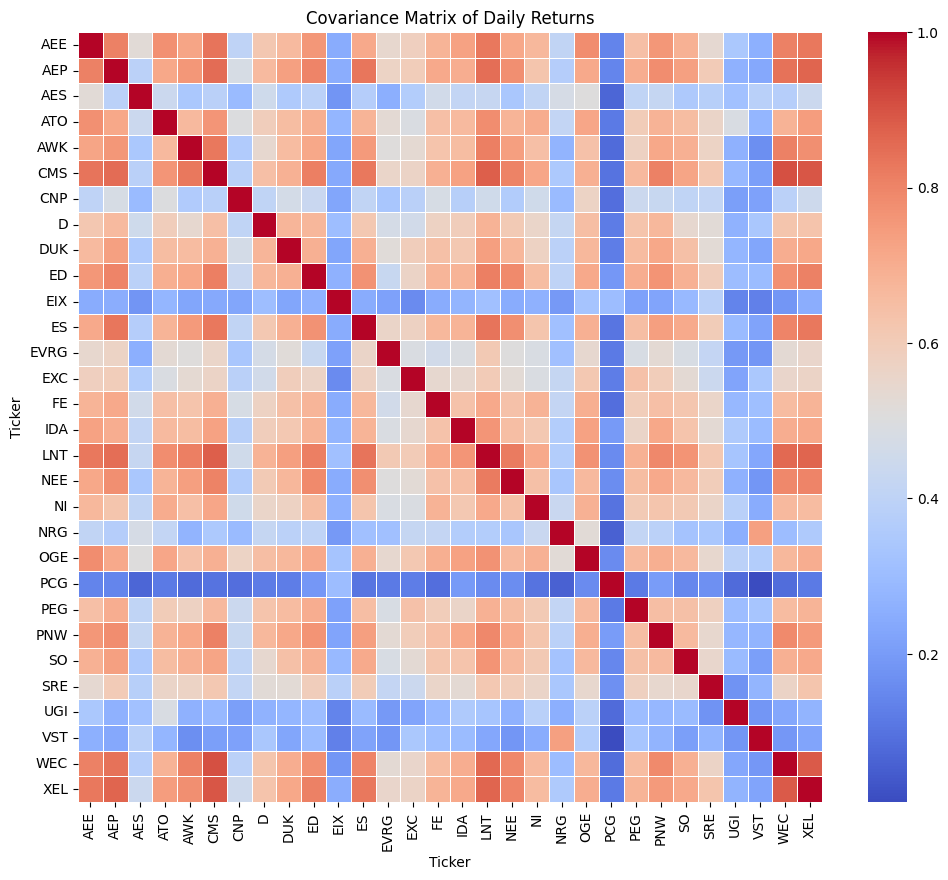

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(standardized_returns_cov, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Covariance Matrix of Daily Returns')
plt.show()

**Question 4(e): Compute the PCA.**

**(compare and contrast PCA and SVD, explain what the eigenvectors, eigenvalues, singular values etc show us for the specific data, etc,)**

**ANSWER**

Both PCA and SVD are dimensionality reduction technicque. They reduce dimensions of matrices but importantly they do retain substantial information or rather variance of a given financial data.

PCA plays a critical role of identifying key factors behind asset price movements whilst reducing dimensionality of risk-based models. Through PCA, one can establish a diversified portfolio based on the principal components. PCA can keep track of unique patterns and ambiguities in portfolio/ETF, which might not be captured in individual asset.

SVD stands for Singular Value Decomposition. It is a robust factorization technique that can effectively decompose any given matrix (Symmetric or not) into 3 matrices, namely, U, SIGMA and V^T. These matrices have mxn, mxn and nxn dimensions respectively. The magnitude of each singular value shows the importance of the corresponding dimension in the data.

Eigen vectors are extracted from PCA and they do represent the principal components which depict relative movements in daily returns of assets. On the other hand, eigenvalues, provides the amount of variance in the daily returns data related to principal components (eigenvector). The higher the eigenvalue, the better it gives information about the asset under analysis.

The following code solutions, shows how Eigenvalues and Eigenvectors help generate Principal Components based on ULX-ETF data under analysis. It is important to note that SVD can be applied to generate eigenvalues and eigenvectors.

In [30]:
# Calculate eigenvectors and eigenvalues of the covariance matrix of standardized dataset
eigenvalues, eigenvectors = np.linalg.eig(standardized_returns_cov)
eigenvalues

array([16.94028164,  1.84467478,  1.26660225,  1.00338367,  0.85284373,
        0.78526949,  0.68313956,  0.62148372,  0.56747546,  0.54817668,
        0.50067292,  0.43553536,  0.39437024,  0.06999281,  0.08276628,
        0.09744372,  0.10123137,  0.1310973 ,  0.36516379,  0.35232213,
        0.33001654,  0.29732331,  0.2820796 ,  0.16274469,  0.1744361 ,
        0.19353911,  0.24393147,  0.23422551,  0.21796543,  0.21981134])

In [31]:
print(pd.DataFrame(eigenvectors).head())

        0         1         2         3         4         5         6   \
0 0.213975  0.029619  0.048261  0.097895 -0.130887 -0.023760 -0.042470   
1 0.219064  0.116063  0.034320 -0.081349 -0.006027  0.016252 -0.048884   
2 0.127139 -0.328995  0.058620  0.160042 -0.144884 -0.216878 -0.387762   
3 0.202650 -0.031366 -0.007040  0.274620  0.072992 -0.025541  0.076438   
4 0.201149  0.183299  0.061815  0.008563 -0.061072 -0.105056  0.072022   

         7         8         9   ...        20        21        22        23  \
0  0.207653 -0.096327 -0.051560  ... -0.028904  0.341928 -0.220447 -0.238768   
1 -0.026486  0.012465 -0.066102  ...  0.192380  0.086947 -0.160603  0.223596   
2  0.658985  0.141547  0.186612  ... -0.012534 -0.139522  0.114489  0.021488   
3 -0.032489 -0.135012 -0.117297  ... -0.166508  0.374384 -0.255864  0.304634   
4 -0.013562 -0.152689  0.084559  ... -0.322117 -0.388155  0.055147  0.373376   

         24        25        26        27        28        29  
0 -0.03741

In [32]:
# Transform standardized data with Loadings
principal_components = standardized_returns_cov.dot(eigenvectors)
principal_components.columns = ["PC_" + str(i) for i in range(1, 31)]
principal_components.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30
Ticker,,,,,,,,,,,,,,,,,,,,,
AEE,3.624797,0.054638,0.061127,0.098226,-0.111626,-0.018658,-0.029013,0.129053,-0.054663,-0.028264,...,-0.009539,0.101663,-0.062184,-0.038858,-0.006527,0.005425,-0.004999,-0.014626,0.063641,0.001142
AEP,3.711000,0.214098,0.043469,-0.081624,-0.005140,0.012762,-0.033395,-0.016461,0.007073,-0.036235,...,0.063489,0.025851,-0.045303,0.036389,0.011346,-0.010465,0.030600,0.027842,0.027747,0.039125
AES,2.153768,-0.606889,0.074249,0.160584,-0.123563,-0.170308,-0.264896,0.409549,0.080325,0.102296,...,-0.004136,-0.041483,0.032295,0.003497,-0.014897,-0.001428,0.000583,-0.002569,-0.040517,-0.011859
ATO,3.432952,-0.057859,-0.008917,0.275549,0.062250,-0.020056,0.052218,-0.020191,-0.076616,-0.064299,...,-0.054950,0.111313,-0.072174,0.049578,0.027503,0.023675,-0.109860,-0.024831,-0.082780,-0.018239
AWK,3.407513,0.338127,0.078295,0.008592,-0.052085,-0.082498,0.049201,-0.008429,-0.086647,0.046353,...,-0.106304,-0.115408,0.015556,0.060765,-0.008770,0.009967,-0.007774,-0.100981,0.072348,-0.059360


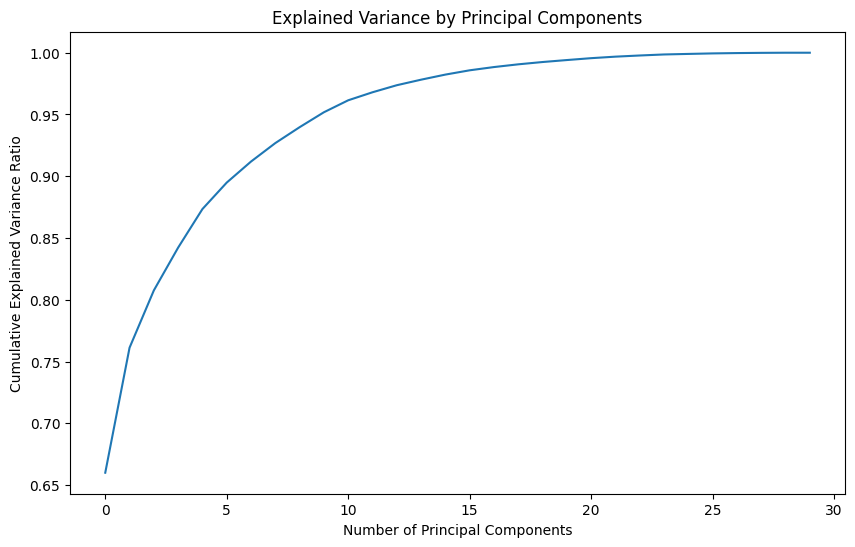

In [33]:
# Visualization for PCA

x = standardized_returns_cov.values  # Convert DataFrame to NumPy array
x = StandardScaler().fit_transform(x)  # Standardize the data

# Apply PCA
pca = PCA(n_components=standardized_returns_cov.shape[1])
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component ' + str(i) for i in range(1, standardized_returns_cov.shape[1] + 1)], index=standardized_returns_cov.index)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

**Question 4(f): Compute the SVD.**

**ANSWER**

In [40]:
# Use SVD to calculate eigenvectors and eigenvalues of the covariance matrix of standardized returns
U_st_return, s_st_return, VT_st_return = np.linalg.svd(standardized_returns_dvd_sqrt_n)
print("\nSquared Singular values (eigenvalues):")
print(s_st_return**2)
print("\nMatrix V (eigenvectors)")
print(pd.DataFrame(VT_st_return.T).head())


Squared Singular values (eigenvalues):
[16.94028164  1.84467478  1.26660225  1.00338367  0.85284373  0.78526949
  0.68313956  0.62148372  0.56747546  0.54817668  0.50067292  0.43553536
  0.39437024  0.36516379  0.35232213  0.33001654  0.29732331  0.2820796
  0.24393147  0.23422551  0.21981134  0.21796543  0.19353911  0.1744361
  0.16274469  0.1310973   0.10123137  0.09744372  0.08276628  0.06999281]

Matrix V (eigenvectors)
         0         1         2         3         4         5         6   \
0 -0.213975 -0.029619  0.048261 -0.097895  0.130887 -0.023760  0.042470   
1 -0.219064 -0.116063  0.034320  0.081349  0.006027  0.016252  0.048884   
2 -0.127139  0.328995  0.058620 -0.160042  0.144884 -0.216878  0.387762   
3 -0.202650  0.031366 -0.007040 -0.274620 -0.072992 -0.025541 -0.076438   
4 -0.201149 -0.183299  0.061815 -0.008563  0.061072 -0.105056 -0.072022   

         7         8         9   ...        20        21        22        23  \
0 -0.207653  0.096327  0.051560  ... -0.

In [53]:
# Presenting the result
print("ETF Returns Matrix Dimension:")
print(daily_returns.shape)
print("\nDimension of Matrix U:")
print(U.shape)
print("\nSingular values:")
print(s_st_return**2)
print("\nDimension of Matrix V^T:")
print(VT_st_return.shape)

ETF Returns Matrix Dimension:
(251, 30)

Dimension of Matrix U:
(251, 251)

Singular values:
[16.94028164  1.84467478  1.26660225  1.00338367  0.85284373  0.78526949
  0.68313956  0.62148372  0.56747546  0.54817668  0.50067292  0.43553536
  0.39437024  0.36516379  0.35232213  0.33001654  0.29732331  0.2820796
  0.24393147  0.23422551  0.21981134  0.21796543  0.19353911  0.1744361
  0.16274469  0.1310973   0.10123137  0.09744372  0.08276628  0.06999281]

Dimension of Matrix V^T:
(30, 30)


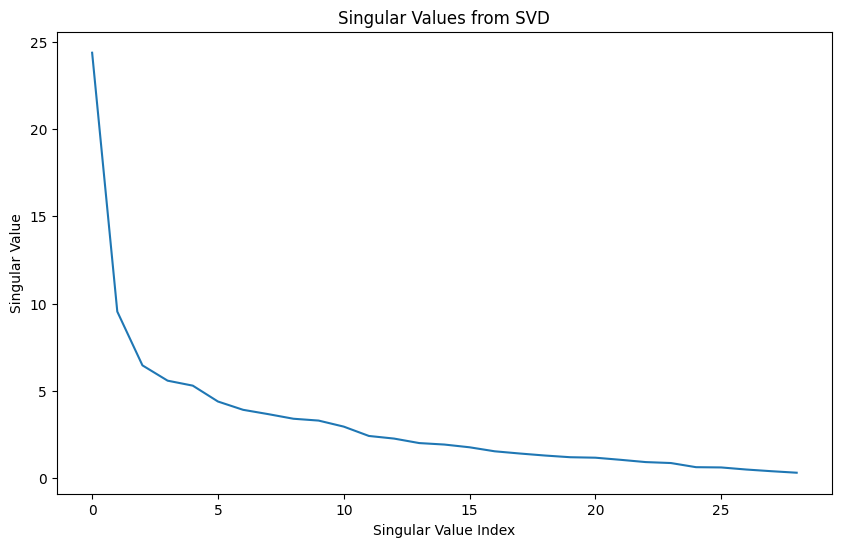

In [54]:
# Visualization for SVD
svd = TruncatedSVD(n_components=standardized_returns_cov.shape[1] - 1)
svd_components = svd.fit_transform(x)
svdDf = pd.DataFrame(data=svd_components, columns=['singular value ' + str(i) for i in range(1, standardized_returns_cov.shape[1])], index=standardized_returns_cov.index)

plt.figure(figsize=(10, 6))
plt.plot(svd.singular_values_)
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Singular Values from SVD')
plt.show()